# Step 1: Installation and Setup

In [1]:
#first selected TPU as it is faster than GPU.
# Installing TensorFlow
! pip install tensorflow-gpu
# -q shows less info in the installation process.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 1.7 MB 45.5 MB/s 
     |████████████████████████████████| 439 kB 58.2 MB/s 
     |████████████████████████████████| 6.0 MB 43.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from Kaggle to Colab

In [4]:
# Installing Kaggle API
! pip install -q kaggle

In [5]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [6]:
# Import API key to google colab
from google.colab import files
uploaded = files.upload()
#uploading kaggle.json file here which we can get by API from our kaggle account.
#used Create New API Token from kaggle account.

Saving kaggle.json to kaggle.json


In [7]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [8]:
# disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [9]:
# list of datasets
! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                     COVID-19 Dataset                                     5MB  2022-11-13 15:47:17          14902        422  1.0              
devrimtuner/list-of-moststreamed-songs-on-spotify             Top 100 Spotify Songs👑🎤🎧🎼                            3KB  2022-12-30 05:42:54            315         24  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india  Credit Card Spending Habits in India               319KB  2022-12-14 07:30:37           1505         51  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset            Fifa World Cu

In [10]:
# importing the dataset by copying API command of the dataset.
! kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:01<00:00, 136MB/s]
100% 218M/218M [00:01<00:00, 119MB/s]


In [11]:
# unzipping the dataset to use the dataset as zip files need to be unzipped.
! unzip -q /content/cat-and-dog.zip

# Step 3: Building the Model

In [12]:
# Creating an object (Initializing CNN)
model = tf.keras.models.Sequential()

In [13]:
# Adding first CCN layer
# 1) filters (kernel/feature detectors) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)
#using same padding.
#adding column or row of zeros is called padding.
#there are 2 types of padding:same and valid padding.
#in same padding we add column of zeros and then apply filter.
#image * filter = output
#after applying filter we can select max value here for each value of matrix
#in the output.
#now in valid padding we don't add a column of zeros here.
#we directly apply filter to get output.
#after applying filter we can select max values here.
#in valid padding we can lose some part of info.
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

In [14]:
# Adding maxpool layer
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
#adding column or row of zeros is called padding.
#there are 2 types of padding:same and valid padding.
#in same padding we add column of zeros and then apply filter.
#image * filter = output
#after applying filter we can select max value or average for each value of matrix
#in the output.
#now in valid padding we don't add a column of zeros here.
#we directly apply filter to get output.
#after applying filter we can select max or average values.
#in valid padding we can lose some part of info.
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [15]:
# adding second CNN layer and maxpool layer
#in 2nd CNN layer we don't specify input_shape parameter.
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
#maxpool layer.
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [16]:
# Adding Flattening layer-- flatten will convert arrays to single vector which is
#required for processing the data.
model.add(tf.keras.layers.Flatten())

In [17]:
# Adding the dropout layer-- regularization technique where randomly selected 
#neurons are removed during training process i.e. ignored neurons are not considered
#during particular forward/backward propagation.Also it will prevent our model
#from learning too much from training data.
model.add(tf.keras.layers.Dropout(0.4))

In [18]:
# Adding fully connected layer -- means Artificial neural network in simple words.
#here we don't add input_shape as we have input shape in 1st CNN layer.
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [19]:
# Adding output layer
#we have binary outputs so we specify no. of units =1 and activation function
#=sigmoid.
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [20]:
# Compiling the model
#before training we have to configure the learning process and this is called
#compiling the model.
#optimizer = 'adam' is stochastic gradient descent algorithm
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 4: Fitting CNN to images

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#fitting CNN Model to images IMAGE DATA GENERATOR.

In [22]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'
#PASTING PATHS OF TRAINING AND TEST DATA.

In [23]:
# rescale images

datagen = ImageDataGenerator(rescale=1./255)

In [24]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)
#reading images in 32 x 32 format.
test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)
#specifying training and test set here.

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [25]:
len(training_set), len(test_set)

(401, 102)

In [26]:
len(training_set) *20, len(test_set)*20
#batch_size=20
#product gives no. of images in training and test dataset.

(8020, 2040)

In [27]:
test_set.batch_size

20

In [28]:
history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)
#training the model
#steps per epoch is specified as the length of training set.
#validation data is test set.
#validation steps is specified as the length of our test set.

Epoch 1/20


<ipython-input-28-2b34cd491ee1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)


401/401 [==============================] - 57s 137ms/step - loss: 0.6823 - accuracy: 0.5584 - val_loss: 0.6453 - val_accuracy: 0.6471
Epoch 2/20
401/401 [==============================] - 53s 133ms/step - loss: 0.6267 - accuracy: 0.6533 - val_loss: 0.5950 - val_accuracy: 0.6891
Epoch 3/20
401/401 [==============================] - 54s 134ms/step - loss: 0.5783 - accuracy: 0.6924 - val_loss: 0.5792 - val_accuracy: 0.7059
Epoch 4/20
401/401 [==============================] - 53s 133ms/step - loss: 0.5423 - accuracy: 0.7198 - val_loss: 0.5402 - val_accuracy: 0.7281
Epoch 5/20
401/401 [==============================] - 50s 125ms/step - loss: 0.5107 - accuracy: 0.7448 - val_loss: 0.5234 - val_accuracy: 0.7504
Epoch 6/20
401/401 [==============================] - 53s 133ms/step - loss: 0.4832 - accuracy: 0.7671 - val_loss: 0.5309 - val_accuracy: 0.7390
Epoch 7/20
401/401 [==============================] - 54s 133ms/step - loss: 0.4671 - accuracy: 0.7801 - val_loss: 0.5116 - val_accuracy: 0.7

In [29]:
#we find training accuracy as 95% and testing accuracy as 77.7% which is widely
#different from each other. This means our model is overfitted.
#Overfitted implies our model haas learnt too much from dataset.
#to improve accuracy we can add more dropout layers after maxpool layer or
#after fully connected layer. For improving accuracy we can increase input_shape.
#we can change target size and batch size also.
#we can increase steps per epoch , epochs and validation steps also.

# Step 5: Plotting the learning curve

In [30]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1) #range of epochs from 1 to end.
  plt.plot(epoch_range, history.history['accuracy']) #accuracy
  plt.plot(epoch_range, history.history['val_accuracy']) #validation accuracy
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()


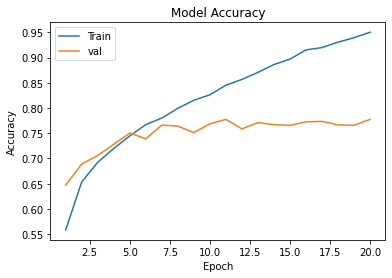

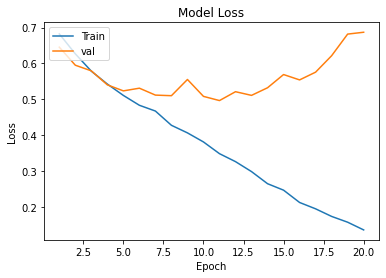

In [31]:
learning_curve(history, 20) #2nd arguement is epoch.

In [32]:
#BY MODEL ACCURACY GRAPH IT IS CLEAR THAT AFTER 5TH EPOCH OUR MODEL'S
#ACCURACY IS NOT INCREASING AND IT STARTS TO OVERFIT.
#AFTER 5TH EPOCH TRAINING LOSS IS DECREASING BUT VALIDATION LOSS IS NOT DECREASING
#SO THE ABOVE MODEL OVERFITS WHICH CAN BE REDUCED BY INCREASING DROPOUT %.